# 1. Getting Started: Airbnb Copenhagen

## Alexander og Ditte

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




<>:55: SyntaxWarning: invalid escape sequence '\$'
<>:55: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Nebul\AppData\Local\Temp\ipykernel_13828\3784657864.py:55: SyntaxWarning: invalid escape sequence '\$'
  data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)


,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


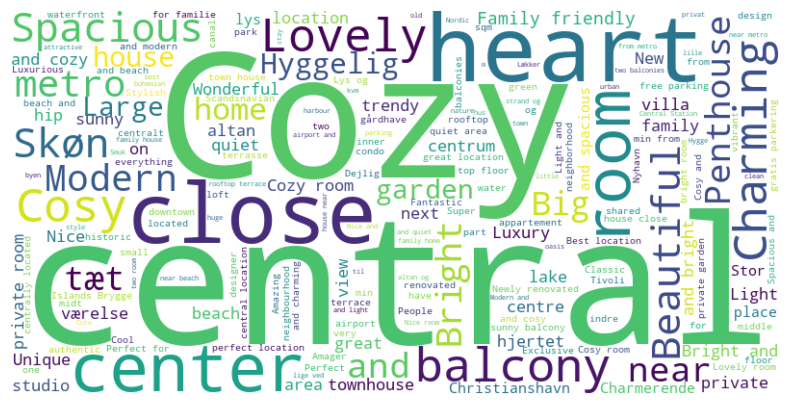

In [29]:
# pip install pandas
# pip install scikit-learn
import pandas as pd
import sklearn as sk

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]

# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

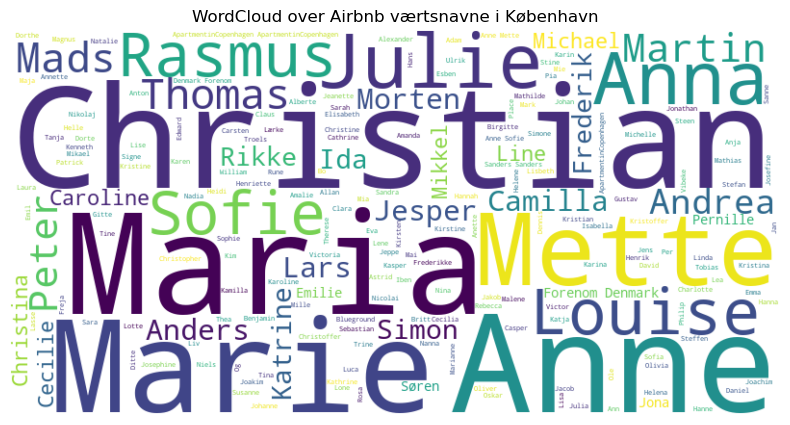

In [30]:
# Henter værtsnavne og fjerner NaN
host_names = data["host_name"].dropna()

# Samler alle værtsnavne i én stor tekststreng
text = " ".join(host_names.astype(str))

# Genererer WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Viser WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud over Airbnb værtsnavne i København")
plt.show()


### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

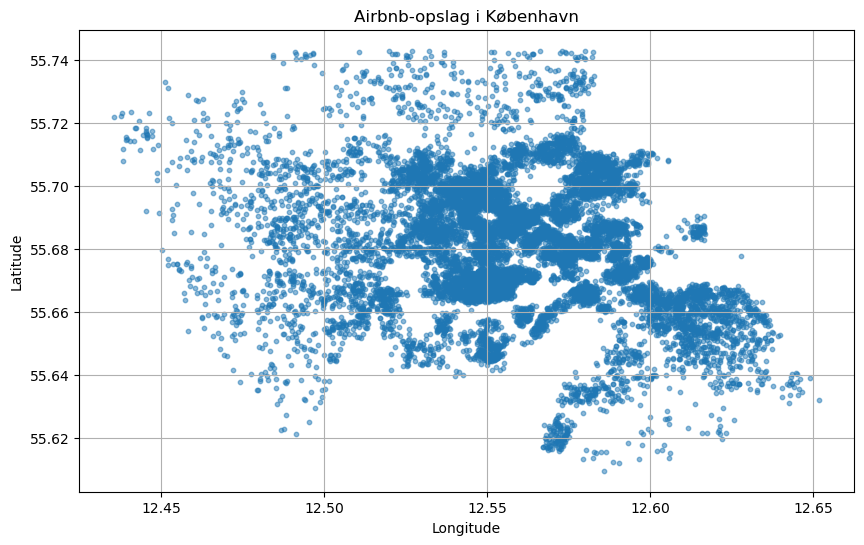

In [31]:
# Henter latitude og longitude fra data
latitude = data["latitude"]
longitude = data["longitude"]

# Plot data
plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, alpha=0.5, s=10)  # Plot punkter
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Airbnb-opslag i København")
plt.grid(True)
plt.show()

### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

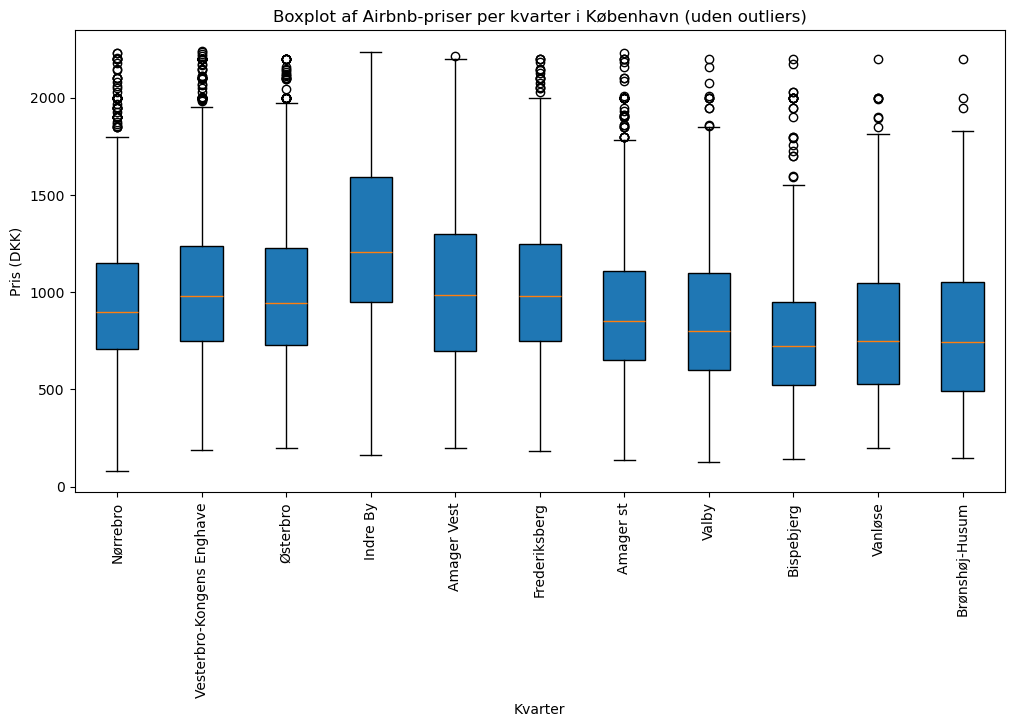

In [32]:
# Beregn Q1 (25%), Q3 (75%) og IQR
Q1 = data_filtered["price"].quantile(0.25)
Q3 = data_filtered["price"].quantile(0.75)
IQR = Q3 - Q1

# Definer outlier-grænser
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer data ved kun at fjerne outliers
filtered_data = data_filtered[(data_filtered["price"] >= lower_bound) & (data_filtered["price"] <= upper_bound)]

# Grupper data efter kvarter og indsamler priser
neighbourhoods = filtered_data["neighbourhood_cleansed"].unique()
price_data = [filtered_data[filtered_data["neighbourhood_cleansed"] == n]["price"] for n in neighbourhoods]

# Opret figur
plt.figure(figsize=(12, 6))

# Boxplot af pris per kvarter (uden outliers)
plt.boxplot(price_data, tick_labels=neighbourhoods, vert=True, patch_artist=True)

# Tilføj labels og titel
plt.xticks(rotation=90)  # Roter kvartersnavne for bedre læsbarhed
plt.xlabel("Kvarter")
plt.ylabel("Pris (DKK)")
plt.title(f"Boxplot af Airbnb-priser per kvarter i København (uden outliers)")

# Vis plot
plt.show()

### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [33]:
# Vælger de relevante kolonner
descriptive_cols = ["neighbourhood_cleansed", "room_type", "price", "number_of_reviews"]

# Filtrerer data
desc_data = data_filtered[descriptive_cols]

# Beregner deskriptiv statistik per kvarter
desc_stats = desc_data.groupby("neighbourhood_cleansed").agg({
    "price": ["mean", "median", "std", "min", "max", lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
    "number_of_reviews": ["mean", "median", "std", "min", "max"],
    "room_type": lambda x: x.mode()[0]  # Finder den mest almindelige rumtype
})

# Omdøber kolonner for bedre forståelse
desc_stats.columns = [
    "Pris - Gennemsnit", "Pris - Median", "Pris - Std", "Pris - Min", "Pris - Max", "Pris - Q1", "Pris - Q3",
    "Anmeldelser - Gennemsnit", "Anmeldelser - Median", "Anmeldelser - Std", "Anmeldelser - Min", "Anmeldelser - Max",
    "Mest almindelige værelsetype"
]

# Sorterer efter medianpris
desc_stats = desc_stats.sort_values(by="Pris - Median", ascending=False)

# Vis resultater på to måder:
display(desc_stats) 
print(desc_stats)    


,Pris - Gennemsnit,Pris - Median,Pris - Std,Pris - Min,Pris - Max,Pris - Q1,Pris - Q3,Anmeldelser - Gennemsnit,Anmeldelser - Median,Anmeldelser - Std,Anmeldelser - Min,Anmeldelser - Max,Mest almindelige værelsetype
neighbourhood_cleansed,,,,,,,,,,,,,
Indre By,1570.907267,1350.0,1065.975980,165.0,20000.0,995.00,1870.50,32.819414,14.0,54.718908,1,602,Entire home/apt
Amager Vest,1205.754485,1000.0,2121.656424,200.0,64900.0,722.00,1400.00,21.058546,9.0,38.928760,1,536,Entire home/apt
Frederiksberg,1216.676296,1000.0,1866.619993,185.0,58000.0,750.00,1339.00,17.204758,9.0,25.457809,1,298,Entire home/apt
Vesterbro-Kongens Enghave,1114.638643,999.0,692.600286,186.0,10800.0,760.25,1299.00,22.167158,9.0,44.293365,1,711,Entire home/apt
Østerbro,1183.891188,979.0,1385.237978,200.0,41800.0,750.00,1331.00,16.144061,8.0,24.159854,1,267,Entire home/apt
Nørrebro,1014.792902,900.0,609.390458,79.0,12500.0,720.00,1199.00,18.089451,9.0,27.208443,1,431,Entire home/apt
Amager st,1019.860390,851.0,704.769611,135.0,10000.0,650.00,1190.00,22.203463,9.0,38.723983,1,453,Entire home/apt
Valby,932.137291,800.0,622.836251,127.0,7429.0,600.00,1119.50,15.782931,7.0,26.347111,1,268,Entire home/apt
Vanløse,874.543624,750.5,502.561017,200.0,3643.0,536.75,1091.75,21.835570,8.0,39.850518,1,324,Entire home/apt


                           Pris - Gennemsnit  Pris - Median   Pris - Std  \
neighbourhood_cleansed                                                     
Indre By                         1570.907267         1350.0  1065.975980   
Amager Vest                      1205.754485         1000.0  2121.656424   
Frederiksberg                    1216.676296         1000.0  1866.619993   
Vesterbro-Kongens Enghave        1114.638643          999.0   692.600286   
Østerbro                         1183.891188          979.0  1385.237978   
Nørrebro                         1014.792902          900.0   609.390458   
Amager st                        1019.860390          851.0   704.769611   
Valby                             932.137291          800.0   622.836251   
Vanløse                           874.543624          750.5   502.561017   
Brønshøj-Husum                    875.487719          750.0   552.009744   
Bispebjerg                        912.066225          747.5  1831.810612   

           

### 5. Based on self-chosen features, and with "price_category" as your target, develop a k-Nearest Neighbor model to determine whether a rental property should be classified as 0 or 1. Remember to divide your data into training data and test data. Comment on your findings.

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Indlæs og forbered data
data = pd.read_csv("listings.csv")

# Fjerner dollartegn og kommaer fra prisen og konverterer til tal
data['price'] = data['price'].replace(r'[\$,]', '', regex=True).astype(float)

# Opretter en binær kategori for prisen (billig = 0, dyr = 1) baseret på medianpris
median_price = data['price'].median()
data['price_category'] = (data['price'] > median_price).astype(int)

# Fjerner rækker med NaN-værdier i nødvendige kolonner
data = data.dropna(subset=["price_category", "number_of_reviews", "availability_365", "review_scores_rating"])

# Konverter kategoriske variabler til tal
label_encoder = LabelEncoder()
data['room_type'] = label_encoder.fit_transform(data['room_type'])
data['neighbourhood_cleansed'] = label_encoder.fit_transform(data['neighbourhood_cleansed'])

# Vælger features og target
features = ["neighbourhood_cleansed", "room_type", "number_of_reviews", "availability_365",
            "review_scores_rating", "calculated_host_listings_count", "minimum_nights"]
X, y = data[features], data["price_category"]

# Sikrer at datasættet ikke er tomt
if X.empty or y.empty:
    raise ValueError("Datasættet er tomt efter filtrering! Tjek om der er for mange NaN-værdier.")

# Opdeler data i trænings- og testdata (80% træning, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardiserer data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reducerer dimensionalitet med PCA (bevarer 50% af variansen)
pca = PCA(n_components=0.50)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Optimerer KNN med GridSearchCV
param_grid = {"n_neighbors": range(3, 11), "weights": ["uniform", "distance"], "metric": ["manhattan"]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Træner den bedste KNN-model baseret på de fundne parametre
knn = KNeighborsClassifier(**grid_search.best_params_)
knn.fit(X_train, y_train)

# Evaluerer modellen
y_pred = knn.predict(X_test)

# Viser resultater
print(f"Bedste parametre: {grid_search.best_params_}")
print(f"KNN Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Bedste parametre: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}
KNN Model Accuracy: 0.64
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.71      0.67      1252
           1       0.65      0.58      0.61      1182

    accuracy                           0.64      2434
   macro avg       0.65      0.64      0.64      2434
weighted avg       0.65      0.64      0.64      2434

